# Proyecto - Variable Selection and Model
Andrea Cecilia Rivas Castaeda

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

In [2]:
X_train = pd.read_csv('prep_Xtrain.csv')
X_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.055044,0.230769,0.75,0.0,0.0,1.0,1.0,1.0,1.0,0.304352,...,0.783642,0.821334,0.548637,0.559322,0.0,0.0,0.0,1.0,0.0,0.0
1,0.792846,0.076923,0.75,1.0,1.0,1.0,1.0,0.0,1.0,0.911457,...,0.361851,0.317632,0.153630,0.445542,1.0,1.0,1.0,1.0,0.0,0.0
2,0.119955,0.153846,0.75,0.0,0.0,1.0,1.0,1.0,1.0,0.366863,...,0.666186,0.659496,1.000000,0.457627,0.0,0.0,0.0,1.0,0.0,0.0
3,0.023073,0.000000,0.75,1.0,0.0,0.5,1.0,1.0,1.0,0.433179,...,0.390570,0.487534,0.627631,0.445542,0.0,0.0,0.0,1.0,0.0,0.0
4,0.759880,0.153846,0.75,0.0,0.0,1.0,1.0,1.0,1.0,0.253361,...,0.824850,0.855721,0.319285,0.559322,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
y_train = pd.read_csv('prep_ytrain.csv')

In [4]:
X_test = pd.read_csv('prep_Xtest.csv')
X_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.338843,0.307692,0.75,1.0,1.0,0.5,1.0,1.0,1.0,0.476316,...,0.063291,0.467133,0.232636,0.677966,1.0,0.0,0.0,1.0,0.0,0.0
1,0.360547,0.384615,0.50,0.0,0.0,0.5,1.0,1.0,1.0,0.274937,...,0.024300,0.162396,0.706623,0.254237,1.0,0.0,0.0,1.0,0.0,0.0
2,0.215672,0.076923,0.75,0.0,0.0,1.0,1.0,1.0,1.0,0.289838,...,0.078554,0.526833,0.435784,0.711864,0.0,0.0,0.0,1.0,0.0,0.0
3,0.435053,0.153846,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.451657,...,0.042038,0.568343,0.732835,0.445542,1.0,0.0,0.0,0.0,1.0,0.0
4,0.389960,0.153846,0.25,1.0,1.0,1.0,0.0,0.0,0.0,0.569677,...,0.026912,0.162396,0.212026,0.203390,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
y_test = pd.read_csv('prep_ytest.csv')

## Selección de Variables

In [6]:
df_copy = X_train.copy()
df_copy['classification'] = y_train
df_copy.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.055044,0.230769,0.75,0.0,0.0,1.0,1.0,1.0,1.0,0.304352,...,0.821334,0.548637,0.559322,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.792846,0.076923,0.75,1.0,1.0,1.0,1.0,0.0,1.0,0.911457,...,0.317632,0.153630,0.445542,1.0,1.0,1.0,1.0,0.0,0.0,1
2,0.119955,0.153846,0.75,0.0,0.0,1.0,1.0,1.0,1.0,0.366863,...,0.659496,1.000000,0.457627,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.023073,0.000000,0.75,1.0,0.0,0.5,1.0,1.0,1.0,0.433179,...,0.487534,0.627631,0.445542,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.759880,0.153846,0.75,0.0,0.0,1.0,1.0,1.0,1.0,0.253361,...,0.855721,0.319285,0.559322,0.0,0.0,0.0,1.0,0.0,0.0,0


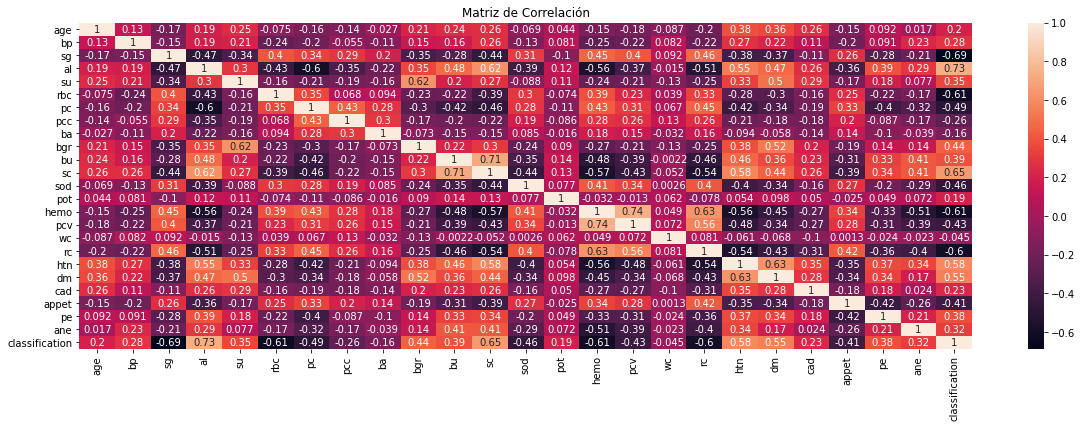

In [7]:
corr_df = df_copy.corr(method='pearson')

plt.figure(figsize=(20, 6))
sns.heatmap(corr_df, annot=True)
plt.title('Matriz de Correlación')
plt.show()

In [8]:
corr_df.classification[abs(corr_df.classification)>0.5]

sg               -0.685329
al                0.730365
rbc              -0.613120
sc                0.651132
hemo             -0.612308
rc               -0.595059
htn               0.584951
dm                0.550525
classification    1.000000
Name: classification, dtype: float64

In [9]:
# Forward Propagation
lasso = LassoCV().fit(X_train, y_train)
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=10, direction="forward").fit(X_train, y_train)
X_train.columns[sfs_forward.get_support()]

Index(['sg', 'al', 'rbc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'rc', 'htn'], dtype='object')

In [10]:
# Backward Propagation
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=8, direction="backward").fit(X_train, y_train)
X_train.columns[sfs_forward.get_support()]

Index(['sg', 'al', 'rbc', 'bu', 'sc', 'sod', 'pot', 'htn'], dtype='object')

In [11]:
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=5, direction="backward").fit(X_train, y_train)
X_train.columns[sfs_forward.get_support()]

Index(['sg', 'al', 'rbc', 'sc', 'htn'], dtype='object')

In [12]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
sfs_knn = SequentialFeatureSelector(knn, n_features_to_select=10).fit(X_train, y_train)
X_train.columns[sfs_knn.get_support()]

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pcc', 'ba', 'hemo', 'dm'], dtype='object')

## Selección de Modelo
* Se realizarón pruebas con los distintos grupos de variables seleccionadas. 

In [13]:
lr = "LogisticRegression().fit(X_train, y_train)"
svm = 'SVC(gamma="scale", kernel="rbf").fit(X_train, y_train)'
dt = 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)'
knn = 'KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)'
nb = 'GaussianNB().fit(X_train, y_train)'
lda = 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)'
qda = 'QuadraticDiscriminantAnalysis(store_covariance = True).fit(X_train, y_train)'
rf = 'RandomForestClassifier(n_estimators=50).fit(X_train, y_train)'

model_list = {'lr': lr, "svm": svm, "dt": dt, "knn": knn, "nb": nb, "lda": lda, "qda": qda, "rf": rf}

model_list

{'lr': 'LogisticRegression().fit(X_train, y_train)',
 'svm': 'SVC(gamma="scale", kernel="rbf").fit(X_train, y_train)',
 'dt': 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)',
 'knn': 'KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)',
 'nb': 'GaussianNB().fit(X_train, y_train)',
 'lda': 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)',
 'qda': 'QuadraticDiscriminantAnalysis(store_covariance = True).fit(X_train, y_train)',
 'rf': 'RandomForestClassifier(n_estimators=50).fit(X_train, y_train)'}

In [14]:
def train_model(cols): 
    train_model_list = {}

    for model_name, model in model_list.items():
        boot = resample(df_copy[cols], replace=True, n_samples=200, random_state=2021)
        X_train = boot.drop("classification", axis=1)
        y_train = boot.classification
        train_model = eval(model)
        train_model_list[model_name] = train_model

    return train_model_list

In [15]:
def test_models(cols, train_model_list):
    acc_scores = {} #Diccionario de Scores
    auc_roc_scores = {}

    result_matrix = pd.DataFrame(columns=np.arange(0, len(y_test), 1))

    for model_name, train_model in train_model_list.items():
        predicciones = train_model.predict(X_test[cols])
        acc = accuracy_score(y_test, predicciones)
        aucroc = roc_auc_score(y_test, predicciones)
        acc_scores[model_name] = acc
        auc_roc_scores[model_name] = aucroc
        tempDf = pd.DataFrame(predicciones).T
        result_matrix = result_matrix.append(tempDf)

    result_matrix.index = list(train_model_list.keys())
    return result_matrix, sorted(acc_scores.items(), key=lambda x: x[1])

### Prueba 1

In [16]:
train_model_list = train_model(['sg', 'al', 'rbc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'htn', 'classification'])
test_models(['sg', 'al', 'rbc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'htn'], train_model_list)[1]

[('qda', 0.26666666666666666),
 ('lr', 0.7333333333333333),
 ('svm', 0.7333333333333333),
 ('dt', 0.7333333333333333),
 ('knn', 0.7333333333333333),
 ('nb', 0.7333333333333333),
 ('lda', 0.7333333333333333),
 ('rf', 0.7333333333333333)]

### Prueba 2

In [17]:
train_model_list = train_model(['sg', 'al', 'rbc', 'bu', 'sc', 'sod', 'pot', 'htn', 'classification'])
test_models(['sg', 'al', 'rbc', 'bu', 'sc', 'sod', 'pot', 'htn'], train_model_list)[1]

[('qda', 0.26666666666666666),
 ('lr', 0.7333333333333333),
 ('svm', 0.7333333333333333),
 ('nb', 0.7333333333333333),
 ('lda', 0.7333333333333333),
 ('dt', 0.8833333333333333),
 ('knn', 0.9833333333333333),
 ('rf', 0.9833333333333333)]

### Prueba 3

In [18]:
train_model_list = train_model(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pcc', 'ba', 'hemo', 'dm', 'classification'])
test_models(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pcc', 'ba', 'hemo', 'dm'], train_model_list)[1]

[('qda', 0.26666666666666666),
 ('dt', 0.7333333333333333),
 ('rf', 0.7333333333333333),
 ('nb', 0.9333333333333333),
 ('lda', 0.9333333333333333),
 ('lr', 0.9833333333333333),
 ('svm', 0.9833333333333333),
 ('knn', 0.9833333333333333)]

### Prueba 4

In [19]:
train_model_list = train_model(['sg','al', 'rbc', 'sc', 'hemo', 'rc', 'htn', 'dm', 'classification'])
test_models(['sg','al', 'rbc', 'sc', 'hemo', 'rc', 'htn', 'dm'], train_model_list)[1]

[('qda', 0.26666666666666666),
 ('dt', 0.7333333333333333),
 ('rf', 0.9166666666666666),
 ('nb', 0.95),
 ('lr', 0.9833333333333333),
 ('svm', 0.9833333333333333),
 ('knn', 0.9833333333333333),
 ('lda', 0.9833333333333333)]

### Prueba 5

In [20]:
train_model_list = train_model(['sg', 'al', 'rbc', 'sc', 'htn', 'classification'])
test_models(['sg', 'al', 'rbc', 'sc', 'htn'], train_model_list)[1]

[('qda', 0.26666666666666666),
 ('dt', 0.9),
 ('nb', 0.9333333333333333),
 ('lr', 0.9833333333333333),
 ('svm', 0.9833333333333333),
 ('knn', 0.9833333333333333),
 ('lda', 0.9833333333333333),
 ('rf', 0.9833333333333333)]

* Se seleccinó la **regresión logística** como modelo final.
* Las variables seleccionadas son: *sg, al, rbc, sc, htn*.